# Introduction to Pandas (reddit)


CHOICES
1. Quickly go towards best practices (even it's slightly harder)

ASSUMPTIONS
1. You have a basic understanding of python
2. You know what pandas is, you've checked out a few tutorials
3. You've read (and maybe followed) a few machine leanring tutorials

## Why Pandas

1. Very familiar interface / data model (Table / Excel)
2. Query data very interactively (once the data is loaded in your notebook, instant answer)
3. Complete freedom in creating custom code

GOOD TO KNOW
- Pandas is a massive library. Even after this class, there'll be a lot of things you won't know from pandas. Use the doc !


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../datasets/reddit_100k.csv')

In [4]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09


In [5]:
# cleaning the utc timestamp
df['utc'] = pd.to_datetime(df['utc'],unit='s')

In [6]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,2016-12-26 10:24:59
1,kabanossi,GetMotivated,2016-12-26 10:23:14
2,kabanossi,vmware,2016-12-26 10:21:16
3,kabanossi,carporn,2016-12-26 10:20:18
4,kabanossi,DIY,2016-12-26 10:17:59


In [7]:
# how many comments per user
df.groupby('username')['subreddit'].count().sort_values(ascending=False).head(10)


username
Spyrothedragon9972    1000
PumpTrump             1000
SidDriver             1000
bruux                 1000
Steel_Wool_Sponge     1000
SweelFor              1000
TalosThoren           1000
jackcalx              1000
TeslaAddict           1000
Tethalamin            1000
Name: subreddit, dtype: int64

In [8]:
# How many unique subreddits per user
df.groupby('username')['subreddit'].nunique().sort_values(ascending=False).head(10)


username
xkcd_transcriber    496
Exuberant_Murica    188
kabanossi           187
Hcfielden           182
bigbuddha999        164
ZoomJet             154
fauxhb              154
bob-leblaw          142
gm4                 139
not_for_porns       127
Name: subreddit, dtype: int64

In [9]:
# calculating a ratio: avg comments by subreddit
# Introducing: the aggreation function
df.groupby('username').agg({'subreddit': lambda x: len(x)})

# Why is it better ?
# - Perform several aggregations on the same column
# - Define the name of the results column
# - Use standard python code rather than specific pandas functions



,subreddit
username,
-goodguygeorge,978
01is,353
0mn17h3047,211
414D59,117
AbulaShabula,363
Adjace-esque,2
Attentive_cactus,167
BasedOnAir,188
BrandEnlightened,426


In [51]:
# Now let's compute that ratio
df2 = df.groupby('username').agg(
    {'subreddit': [
                    ('comments', 'count'),
                    ('unique_subs', lambda x: len(set(x)))
                ]
    },    
)

In [52]:
df2 = df2.droplevel(axis='columns', level=0)

In [46]:
df3['comments_per_sub'] = df3['comments'] / df3['unique_subs']
df4 = df3.sort_values(by='comments_per_sub', ascending=False)

In [50]:
df4.loc[df4['comments'] < 1000]

active_redditors = df4.loc[(df4['comments'] < 1000) & (df4['unique_subs'] >= 10) & (df4['comments_per_sub'] >= 3)]

In [10]:
# Exercise
# 1. Find the top 10 subreddits with the most users
# 2. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
# 3. Find the subreddit with the most comments in one hour




In [71]:
# Writing it in clean pandas

# We use "method chaining" to avoid intermediate dataframes
# Advantages:
# 1. Avoids mistakes (easy to make errors when you reach df42)
# 2. You can read all the logic step by step

active_redditors = \
(df.groupby('username')
   .agg({'subreddit': [('comments', 'count'),
                       ('unique_subs', lambda x: len(set(x))),
                      ]
        })
    .droplevel(axis='columns', level=0)
    .assign(comments_per_sub=lambda x: x['comments'] / x['unique_subs'])
    .sort_values(by='comments_per_sub', ascending=False)
    .query('comments < 1000')
    .query('unique_subs >= 10')
    .query('comments_per_sub >= 3') 
)
active_redditors.head()

,comments,unique_subs,comments_per_sub
username,,,
mr_fn_wonderful,999,21,47.571429
The_seph_i_am,986,32,30.812500
laserbong,804,29,27.724138
BrandEnlightened,426,20,21.300000
QuatreBarton,336,16,21.000000


In [76]:
# Exercise
# 1. Find the top 10 subreddits with the most users
# 2. For active redditors, find the median number of comments, the 25th and 75th percentile of unique_subs
# 3. Find the subreddit with the most comments in one hour

#1. 
df.groupby('subreddit').agg({'username': 'nunique'}).sort_values(by='username', ascending=False).head(10)
#2. 
active_redditors['comments'].median()
np.percentile(active_redditors['unique_subs'], 25)
np.percentile(active_redditors['unique_subs'], 75)
#3.


358.0

In [86]:
df

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09
5,kabanossi,food,1.482747e+09
6,kabanossi,CatastrophicFailure,1.482514e+09
7,kabanossi,photoshopbattles,1.482514e+09
8,kabanossi,carporn,1.482513e+09
9,kabanossi,techsupport,1.482513e+09


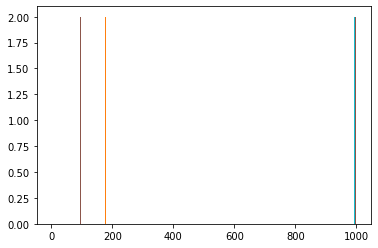

In [101]:
user_summary = df.groupby(by=['username']).count()
plt.hist(user_summary, bins=100)
plt.show()